# Sensor Calibration using Linear Regression

This notebook demonstrates the calibration of a lower-end sensor against a high-end reference sensor using linear regression. 
The following steps are covered:

1. Reading data from CSV files.
2. Preparing and merging datasets.
3. Performing linear regression.
4. Visualizing the results.

This process helps to establish a mathematical relationship between two sensors to calibrate the lower-end sensor's measurements.

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plots
sns.set(style='whitegrid')

## Step 1: Load the datasets

Here, we load two datasets:
1. High-end sensor data (`high_end_sensor_data.csv`)
2. Lower-end sensor data (`sensor1_data.csv`)

Both datasets should have a common column (e.g., 'PM10') for calibration.

In [3]:
# Define file names and column name
column_name = 'PM10'
high_end_sensor_file = 'high_end_sensor_data.csv'
sensor1_file = 'sensor1_data.csv'

# Read the data from CSV files
high_end_sensor_data = pd.read_csv(high_end_sensor_file)
sensor1_data = pd.read_csv(sensor1_file)

# Display sample data
print('High-End Sensor Data (Sample):')
display(high_end_sensor_data.head())

print('Sensor1 Data (Sample):')
display(sensor1_data.head())

High-End Sensor Data (Sample):


,PM25,PM10
0,33.881573,112.793420
1,34.461682,70.883769
2,35.974989,76.010415
3,22.946075,134.181312
4,18.976898,116.029800


Sensor1 Data (Sample):


,PM25,PM10
0,20.826785,118.561133
1,34.251643,63.329857
2,29.155459,71.001243
3,26.048743,143.956865
4,15.735234,115.036477


## Step 2: Validate and Merge Datasets

Before merging, ensure the required column exists in both datasets. After validation, merge the data.

In [4]:
# Ensure the column exists in both datasets
if column_name not in high_end_sensor_data.columns or column_name not in sensor1_data.columns:
    raise ValueError(f"Column '{column_name}' must exist in both datasets.")

# Rename columns to avoid conflicts after merging
high_end_sensor_data = high_end_sensor_data.rename(columns={column_name: f'{column_name}_high'})
sensor1_data = sensor1_data.rename(columns={column_name: f'{column_name}_sensor1'})

# Merge the data on a common index or column
merged_data = pd.merge(high_end_sensor_data, sensor1_data, left_index=True, right_index=True)

# Display merged data sample
print('Merged Data (Sample):')
display(merged_data.head())

Merged Data (Sample):


,PM25_x,PM10_high,PM25_y,PM10_sensor1
0,33.881573,112.793420,20.826785,118.561133
1,34.461682,70.883769,34.251643,63.329857
2,35.974989,76.010415,29.155459,71.001243
3,22.946075,134.181312,26.048743,143.956865
4,18.976898,116.029800,15.735234,115.036477


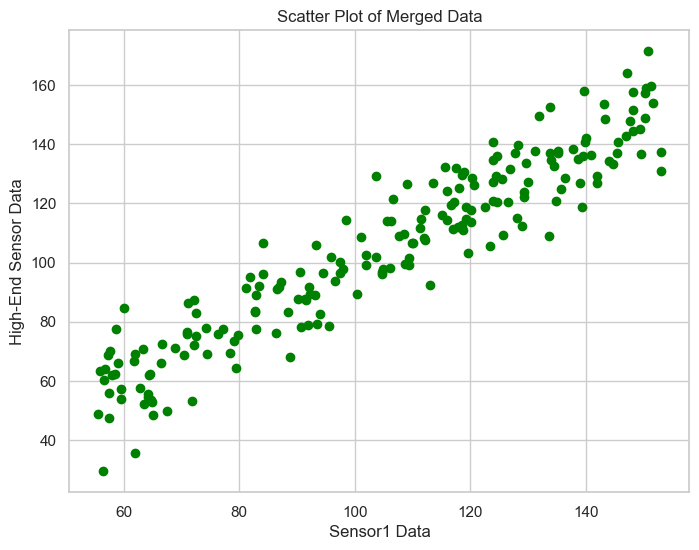

In [5]:
# Scatter plot of the merged data
plt.figure(figsize=(8, 6))
plt.scatter(merged_data[f'{column_name}_sensor1'], merged_data[f'{column_name}_high'], color='green')
plt.xlabel('Sensor1 Data')
plt.ylabel('High-End Sensor Data')
plt.title('Scatter Plot of Merged Data')
plt.show()

## Step 3: Perform Linear Regression

Using the lower-end sensor data as the independent variable (X) and the high-end sensor data as the dependent variable (y), 
we fit a linear regression model.

In [7]:
# Extract relevant columns for regression
X = merged_data[[f'{column_name}_sensor1']].values  # Sensor1 data
y = merged_data[f'{column_name}_high'].values       # High-end sensor data

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficient and intercept
coefficient = model.coef_[0]
intercept = model.intercept_

# Print the results
print(f'Coefficient: {coefficient}')
print(f'Intercept: {intercept}')

Coefficient: 0.9906418391604925
Intercept: 0.5170801847402089


### Other Regression Models

In addition to the standard linear regression model, we also explore **Ridge** and **Lasso** regression models. These models are useful when dealing with multicollinearity or when we want to perform feature selection.

#### Ridge Regression
Ridge regression adds a penalty equal to the square of the magnitude of the coefficients to the loss function. This penalty term helps shrink the coefficients, thus reducing model complexity and preventing overfitting.

The Ridge regression model equation is:

$$
y = \beta_0 + \beta_1 X + \lambda \sum_{i=1}^{n} \beta_i^2
$$

Where:
- \( \beta_0 \): Intercept
- \( \beta_1 \): Coefficient
- \( \lambda \): Regularization parameter

In [14]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X, y)

# Get the coefficient, intercept, and regularization parameter
ridge_coefficient = ridge_model.coef_[0]
ridge_intercept = ridge_model.intercept_
ridge_alpha = ridge_model.alpha

# Print the first 5 predictions
ridge_predictions = ridge_model.predict(X)
print('Ridge Regression Predictions (first 5):', ridge_predictions[:5])

# Print the coefficients, intercept, and regularization parameter
print(f'Ridge Coefficient: {ridge_coefficient}')
print(f'Ridge Intercept: {ridge_intercept}')
print(f'Ridge Regularization Parameter (alpha): {ridge_alpha}')

# Display the equation for the Ridge regression model
print(f'Ridge Regression Model Equation: y = {ridge_coefficient} * X + {ridge_intercept}')


Ridge Regression Predictions (first 5): [117.96861837  63.25453187  70.85408258 143.12654248 114.47696746]
Ridge Coefficient: 0.9906359228380804
Ridge Intercept: 0.5177010030189422
Ridge Regularization Parameter (alpha): 1.0
Ridge Regression Model Equation: y = 0.9906359228380804 * X + 0.5177010030189422



#### Lasso Regression
Lasso regression adds a penalty equal to the absolute value of the magnitude of the coefficients to the loss function. This penalty term can shrink some coefficients to zero, effectively performing feature selection.

The Lasso regression model equation is:

$$
y = \beta_0 + \beta_1 X + \lambda \sum_{i=1}^{n} |\beta_i|
$$

Where:
- \( \beta_0 \): Intercept
- \( \beta_1 \): Coefficient
- \( \lambda \): Regularization parameter


In [15]:
# Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X, y)

# Get the coefficient, intercept, and regularization parameter
lasso_coefficient = lasso_model.coef_[0]
lasso_intercept = lasso_model.intercept_
lasso_alpha = lasso_model.alpha

# Print the first 5 predictions
lasso_predictions = lasso_model.predict(X)
print('Lasso Regression Predictions (first 5):', lasso_predictions[:5])

# Print the coefficients, intercept, and regularization parameter
print(f'Lasso Coefficient: {lasso_coefficient}')
print(f'Lasso Intercept: {lasso_intercept}')
print(f'Lasso Regularization Parameter (alpha): {lasso_alpha}')

# Display the equation for the Lasso regression model
print(f'Lasso Regression Model Equation: y = {lasso_coefficient} * X + {lasso_intercept}')

Lasso Regression Predictions (first 5): [117.95242105  63.30397875  70.89441176 143.08016149 114.46495931]
Lasso Coefficient: 0.9894473897618926
Lasso Intercept: 0.6424175088452557
Lasso Regularization Parameter (alpha): 1.0
Lasso Regression Model Equation: y = 0.9894473897618926 * X + 0.6424175088452557



#### Benefits of Ridge and Lasso Regression
Both Ridge and Lasso regression models help improve the generalization of the model by adding a regularization term to the loss function:
- **Ridge**: Reduces model complexity by shrinking coefficients but does not perform feature selection.
- **Lasso**: Performs feature selection by shrinking some coefficients to zero.


## Step 4: Visualize Results

The scatter plot below shows the raw data points (blue dots). The red line represents the regression line fit to the data.

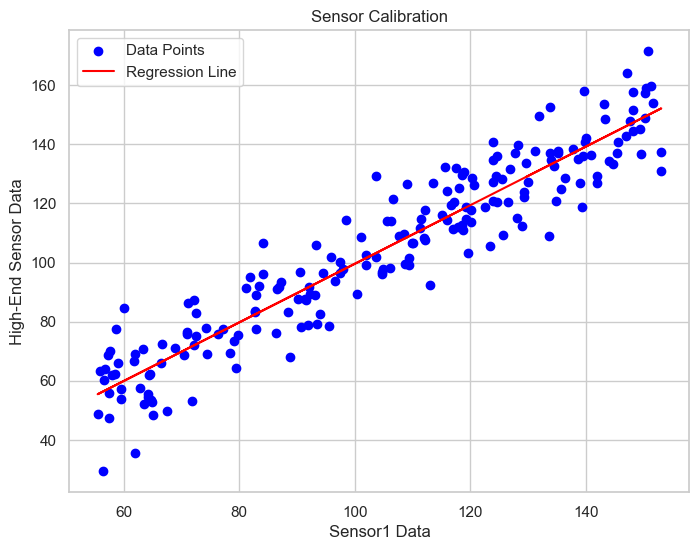

In [5]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Sensor1 Data')
plt.ylabel('High-End Sensor Data')
plt.title('Sensor Calibration')
plt.legend()
plt.show()

### Residuals Plot

Residuals are the differences between the observed and predicted values. A good model should have residuals randomly distributed around zero.

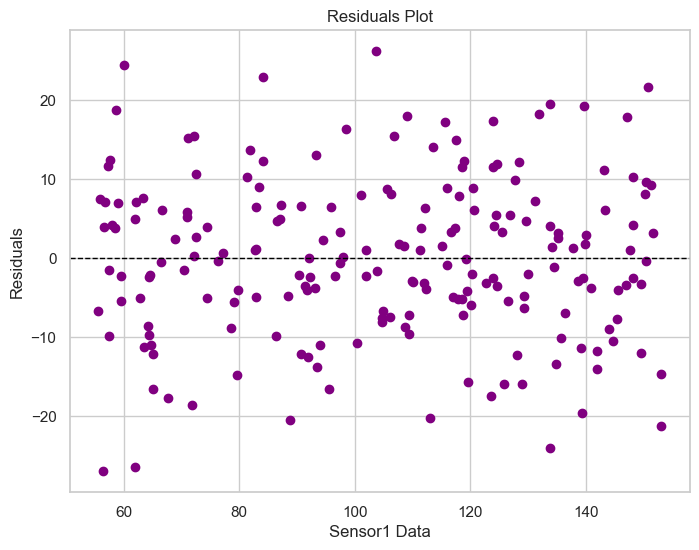

In [6]:
# Calculate residuals
residuals = y - model.predict(X)

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(X, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Sensor1 Data')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions from the linear regression model
linear_predictions = model.predict(X)

# Calculate metrics for the linear regression model
mse = mean_squared_error(y, linear_predictions)
mae = mean_absolute_error(y, linear_predictions)
r2 = r2_score(y, linear_predictions)

print(f'Linear Regression Model Metrics:')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Linear Regression Model Metrics:
Mean Squared Error (MSE): 103.45342876391905
Mean Absolute Error (MAE): 8.112812950467074
R-squared (R2): 0.8881660919492494


In [13]:
# Calculate metrics for the linear regression model
linear_mse = mean_squared_error(y, linear_predictions)
linear_mae = mean_absolute_error(y, linear_predictions)
linear_r2 = r2_score(y, linear_predictions)

# Calculate metrics for the lasso regression model
lasso_mse = mean_squared_error(y, lasso_predictions)
lasso_mae = mean_absolute_error(y, lasso_predictions)
lasso_r2 = r2_score(y, lasso_predictions)

# Calculate metrics for the ridge regression model
ridge_mse = mean_squared_error(y, ridge_predictions)
ridge_mae = mean_absolute_error(y, ridge_predictions)
ridge_r2 = r2_score(y, ridge_predictions)

# Create a DataFrame to compare the metrics
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression'],
    'MSE': [linear_mse, lasso_mse, ridge_mse],
    'MAE': [linear_mae, lasso_mae, ridge_mae],
    'R2': [linear_r2, lasso_r2, ridge_r2]
})

# Display the metrics comparison
display(metrics_df)

# Determine the best performing model based on R2 score
best_model = metrics_df.loc[metrics_df['R2'].idxmax()]
print(f'Best Performing Model:\n{best_model}')

,Model,MSE,MAE,R2
0,Linear Regression,103.453429,8.112813,0.888166
1,Lasso Regression,103.454623,8.111944,0.888165
2,Ridge Regression,103.453429,8.112809,0.888166


Best Performing Model:
Model    Linear Regression
MSE             103.453429
MAE               8.112813
R2                0.888166
Name: 0, dtype: object
